In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
from matplotlib import pyplot as plt, colors as colors
from matplotlib.gridspec import GridSpec
from glob import glob
from astropy.timeseries import LombScargle
from scipy import stats
import warnings
from TESStools import *

In [2]:
massive_observed = pd.read_csv('../data/massive_observed.csv')
lbvs = massive_observed[massive_observed['SpT']=='LBV'].reset_index(drop=True)
#let's add in T_effs and Ls
logT_q = [4.26,4.26,4.23,4.58,4.3,4.4,4.46]
logL = [5.70,6.1,6.3,5.68,5.82,6.54,5.80]
source = ['1','1','1','4','2,3','2','4']
names = ['P Cyg','$\zeta^1$ Sco$^*$','HD 80077$^*$','HD 148937$^*$','S Dor','$\eta$ Car','HD 269582']
source_dict = {'1':'clark05b','2':'humphreys94','3':'lamers95','4':'vangenderen01'}
lbvs['logT_q'] = logT_q
lbvs['logL'] = logL
lbvs['Spec_source'] = source
lbvs['TeX_name'] = names
lbvs.sort_values('logT_q',inplace=True)
lbvs = lbvs[lbvs['CommonName'] != '* eta Car'].reset_index(drop=True)
lbvs

,TIC ID,RA,Dec,dist,pmRA,pmDec,Tmag,ContRatio,SpT,CommonName,MKType,SimbadOType,SimbadSpT,logT_q,logL,Spec_source,TeX_name
0,391624171,138.978279,-49.973493,0.039651,-5.295830,4.813780,5.7508,NaN,LBV,HD 80077,B,BlueSG*,B2Ia+e,4.23,6.30,1,HD 80077$^*$
1,12149245,304.446674,38.032930,0.054074,-3.498230,-6.819400,4.2616,NaN,LBV,* P Cyg,B2pe,BlueSG*,B1-2Ia-0ep,4.26,5.70,1,P Cyg
2,246962305,253.498863,-42.362032,0.035873,0.008812,-2.939490,4.3819,NaN,LBV,* zet01 Sco,B1p,BlueSG*,B1Ia-0ek,4.26,6.10,1,$\zeta^1$ Sco$^*$
3,179305185,79.559822,-69.250319,0.051135,1.734760,0.279512,7.4155,NaN,LBV,V* S Dor,A5Iaeq,SG*,A5Iaeq,4.30,5.82,"2,3",S Dor
4,279957111,81.969425,-68.985691,0.078509,1.739400,0.485263,10.5263,NaN,LBV,HD 269582,NaN,WR*,WN10h,4.46,5.80,4,HD 269582
5,21931623,248.468278,-48.111244,0.040351,0.880148,-3.381430,6.4483,NaN,LBV,HD 148937,B0,SB*,O6f?p,4.58,5.68,4,HD 148937$^*$


In [3]:
header = r"""\centerwidetable
\begin{deluxetable*}{lccccccccc}
\tabletypesize{\scriptsize}
\tablecaption{Names, TIC numbers, coordinates, proper motions, \tess magnitudes and positions in the HR diagram of the LBVs observed by {\it TESS,} ordered by effective temperature from coolest to warmest. Only the effective temperature at quiescence is given. The source of the star's position in the HR diagram is given. Candidate LBVs are marked with an asterisk.\label{tab:sample}}
\tablehead{\colhead{Common Name} & \colhead{TIC Number} & \colhead{R.A.} & \colhead{Dec} & \colhead{$\mu_\alpha$} & \colhead{$\mu_\delta$} &  \colhead{$T$} & \colhead{$\log T_{\rm{eff}}$} & \colhead{$\log L/L_\odot$} & \colhead{Source} \\
\colhead{} & \colhead{} & \colhead{[deg]} & \colhead{[deg]} & \colhead{[mas/yr]} & \colhead{[mas/yr]} & \colhead{[mag]} & \colhead{[K]} & \colhead{$L_\odot$} & \colhead{}} 
\startdata
"""
for i,row in lbvs.iterrows():
    name = row['TeX_name']
    tic = row['TIC ID']
    ra = f"{row['RA']:.8f}"
    dec = f"{row['Dec']:.8f}"
    pmra = f"{row['pmRA']:.3f}"
    pmdec = f"{row['pmDec']:.3f}"
    tmag = f"{row['Tmag']:.3f}"
    teff = f"{row['logT_q']:.2f}"
    lum = f"{row['logL']:.2f}"
    source = row['Spec_source']
    sources = source.split(',')
    cite_string = '\citet{'
    for i,s in enumerate(sources):
        if i>0:
            cite_string += f',{source_dict[s]}'
        else:
            cite_string += f'{source_dict[s]}'
    cite_string += '}'
    
    entry = list(map(str,[name,tic,ra,dec,pmra,pmdec,tmag,teff,lum,cite_string]))
    
    sep = ' & '
    
    header += sep.join(entry)
    header += ' \\\\ \n'
header.rstrip()
header.rstrip('\\')
header.rstrip()
header += r"""\enddata
\end{deluxetable*}

"""
with open("lbv_table.txt", "w") as text_file:
        text_file.write(header)

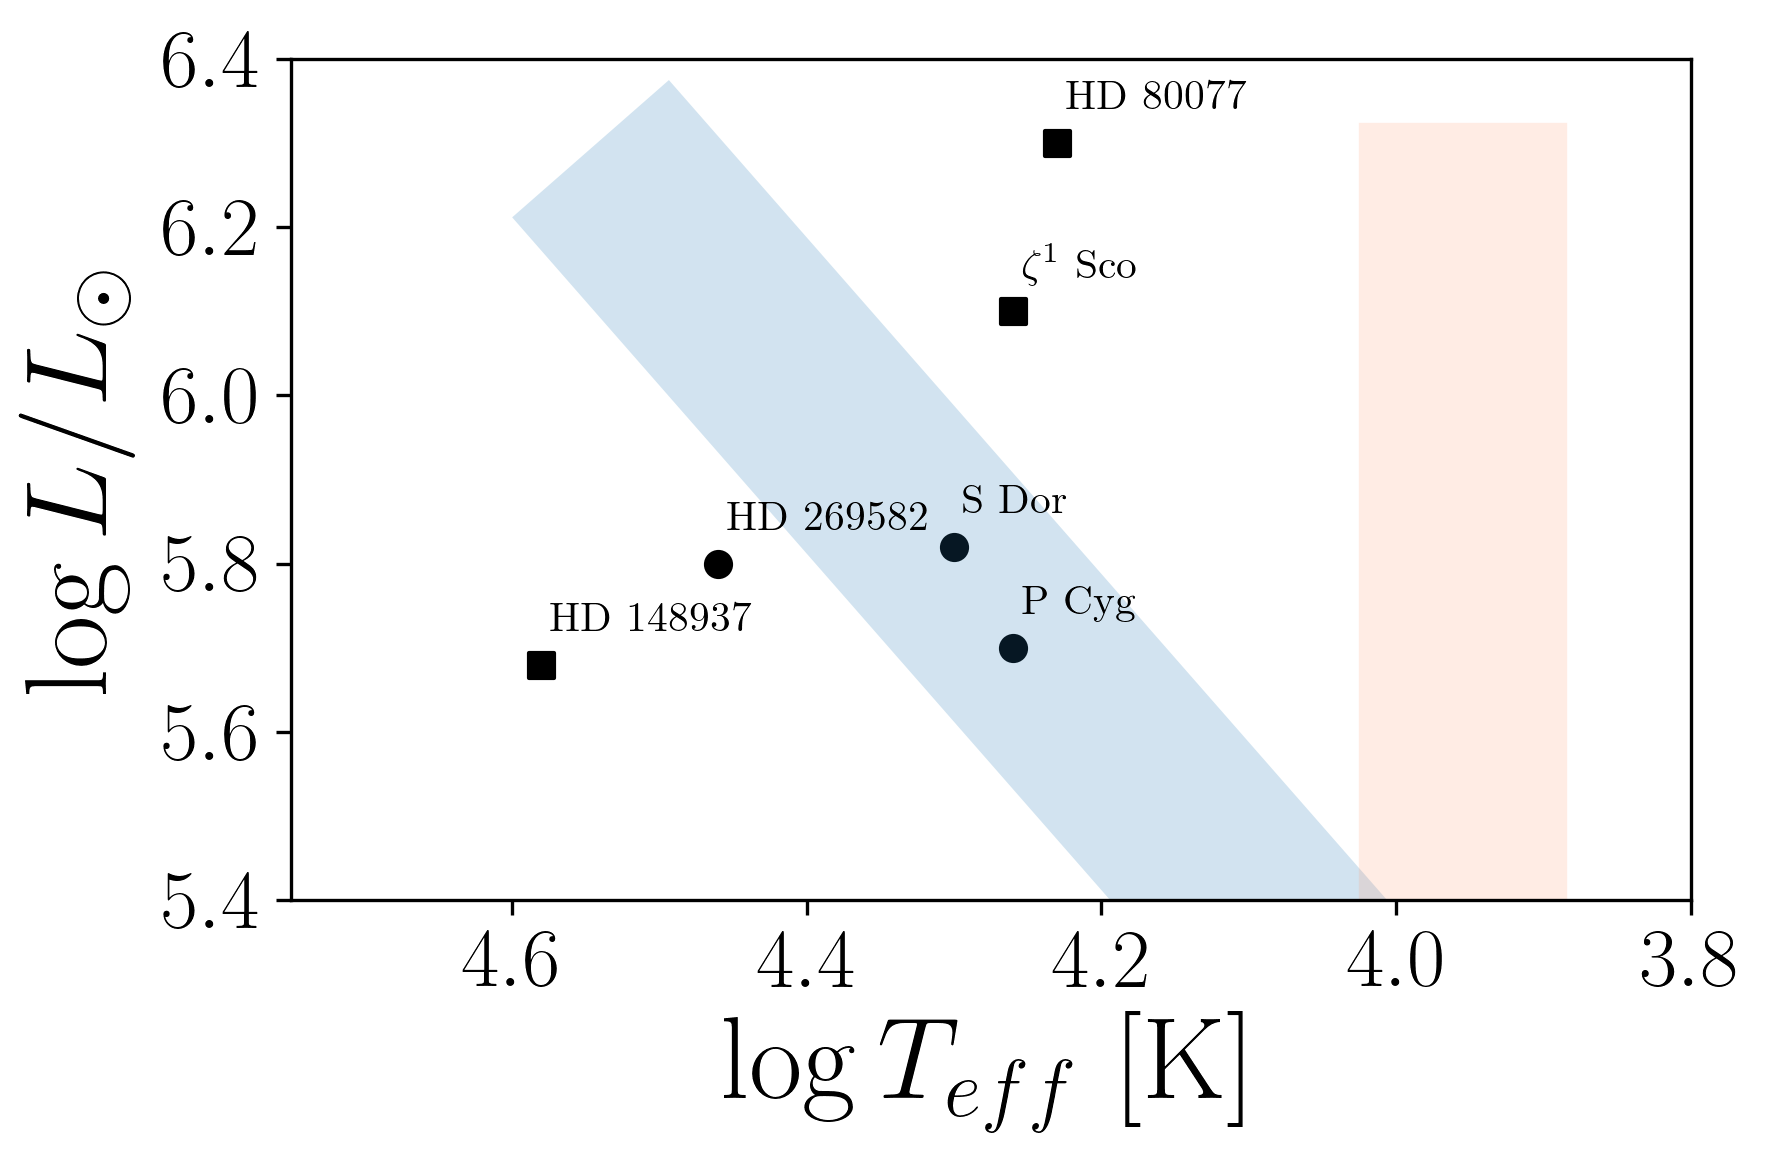

In [4]:
fig = plt.figure(dpi=300)
plt.plot([4.5,4.1],[6.2,5.4],lw=50,alpha=0.2)
plt.plot([np.log10(9000),np.log10(9000)],[6.2,5.4],lw=50,alpha=0.2,c='lightsalmon')
x_offs = [0.006,0.006,0.006,0.006,0.006,0.006]
for (i,row),off in zip(lbvs.iterrows(),x_offs):
    if '$^*$' in row['TeX_name']:
        marker='s'
    else:
        marker='o'
    plt.scatter(row['logT_q'],row['logL'],c='k',marker=marker)
    plt.text(row['logT_q']-off,row['logL']+0.04,row['TeX_name'].rstrip('$^*$'))
    



plt.xlabel('$\log{T_{eff}}$ [K]')
plt.ylabel('$\log{L/L_\odot}$')

plt.ylim(5.4,6.4)
plt.xlim(4.75,3.8)

ax = plt.gca()
ax.xaxis.label.set_size(28)
ax.yaxis.label.set_size(28)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

plt.tight_layout()
plt.savefig('../plots/lbv_hr.pdf')

0.03486008293903155 10.22696157504779
0.13113766745216193 5.456175951767818
0.06340798795269405 14.008427567475126
0.002530508179703758 32.093107549593284
0.0004700760593963764 108.62196384444029
0.0036607582339191424 265.44714717690476


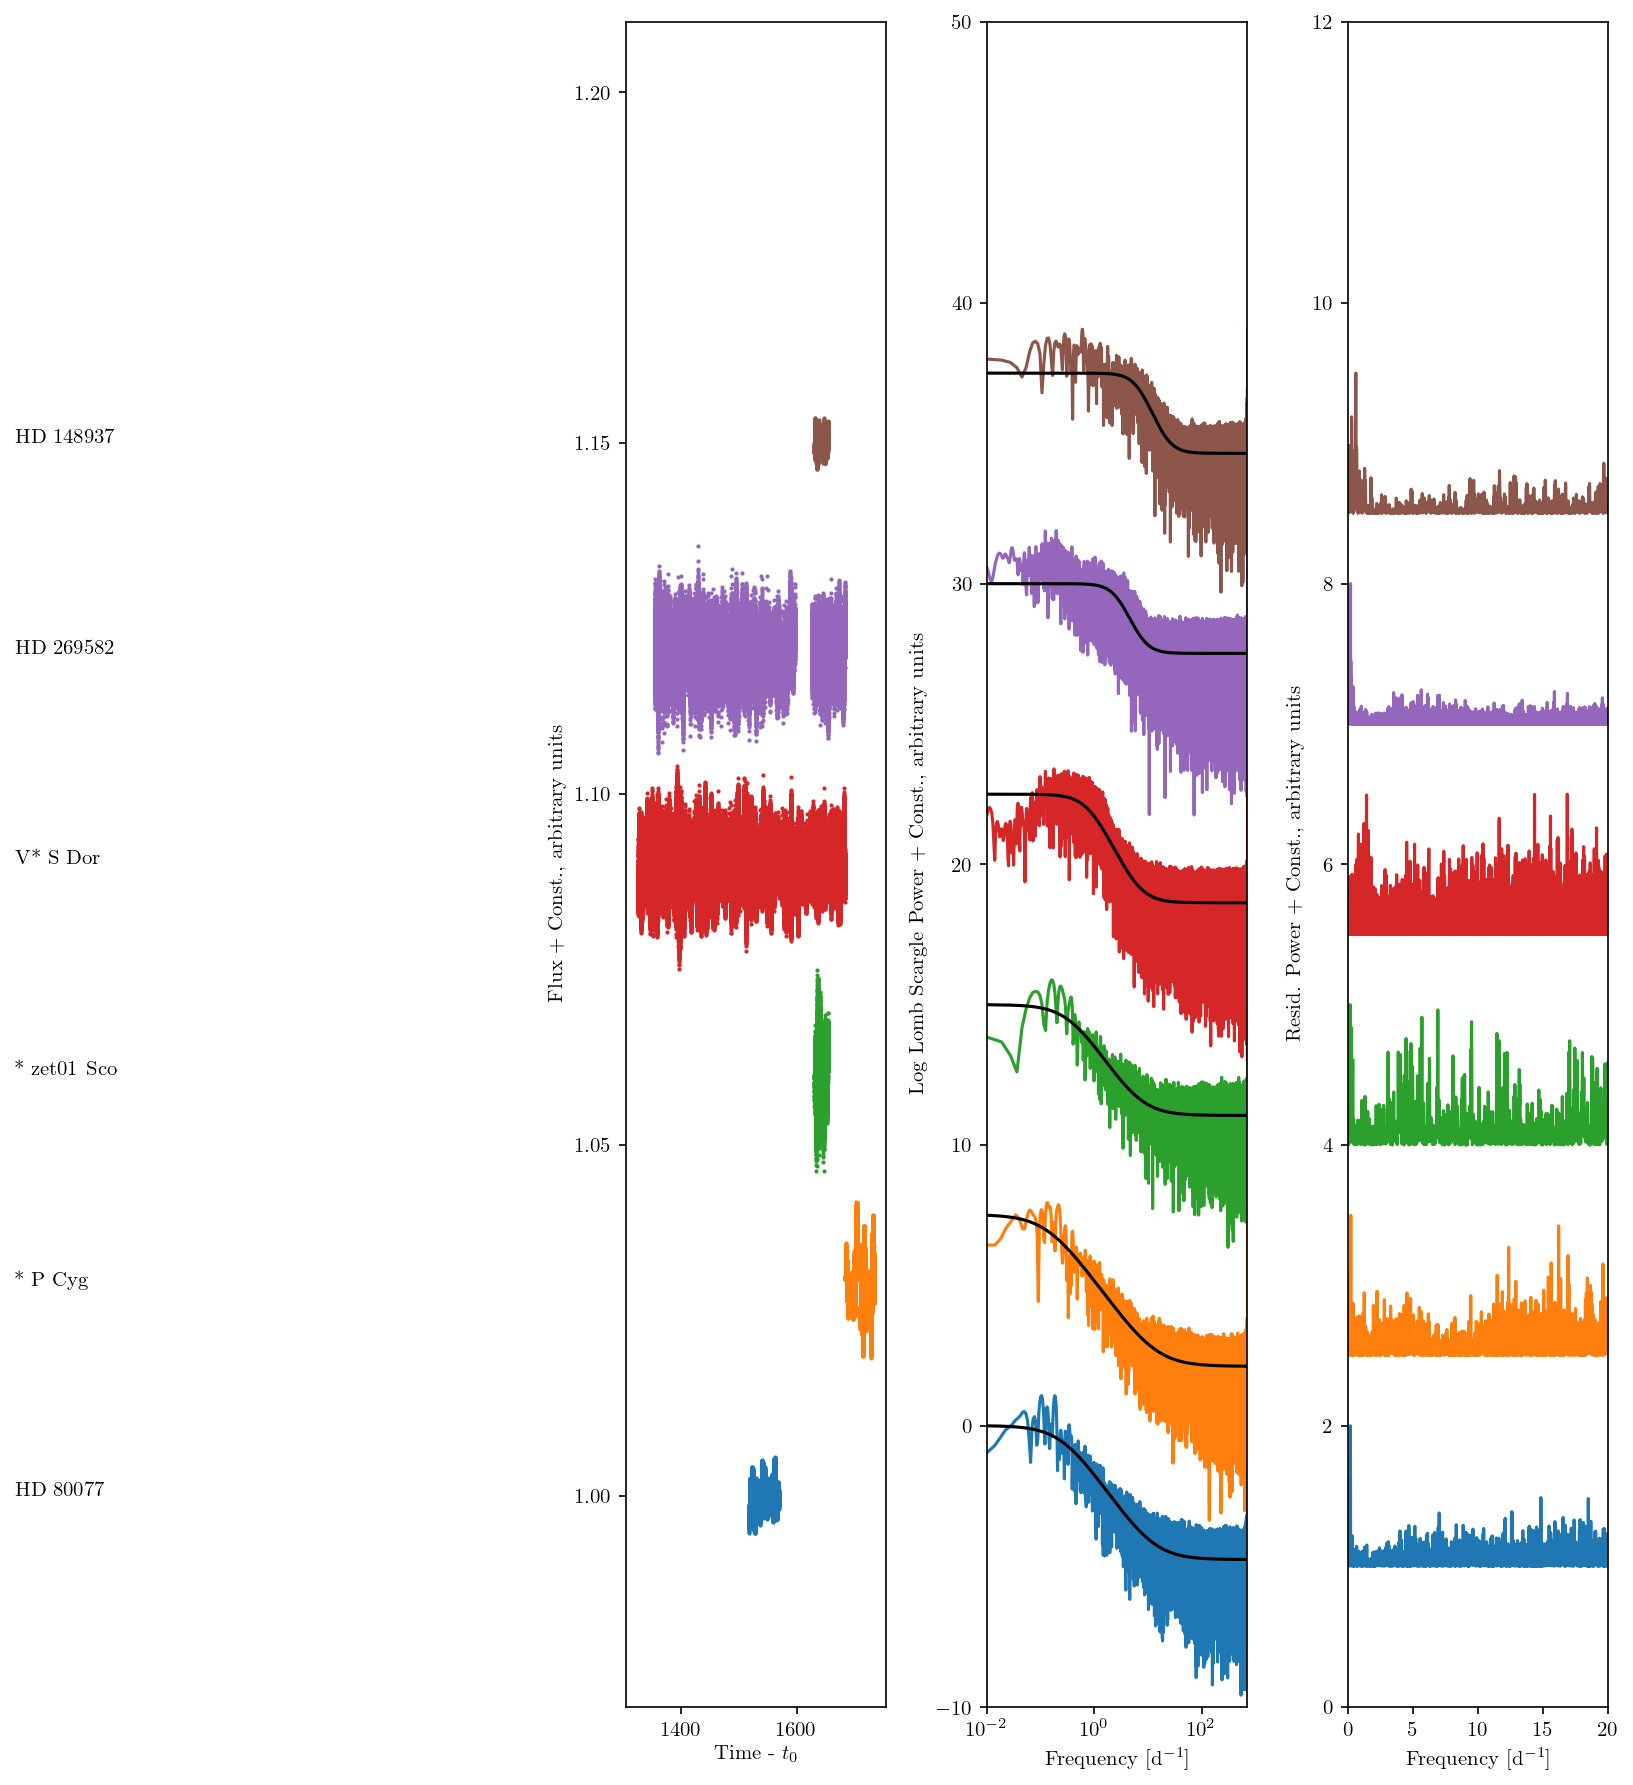

In [5]:
fig, axes = plt.subplots(ncols=3,figsize=(15,12),dpi=150)
offset = 0
for j,star in lbvs.iterrows():
    lc, lc_smooth = lc_extract(get_lc_from_id(star['TIC ID']), smooth=128)
    time, flux, err = lc['Time'], lc['Flux'], lc['Err']
    axes[0].scatter(time,flux/flux.median() + offset,s=1)
    ls = LombScargle(time,flux,dy=err)
    freq,power=ls.autopower(minimum_frequency=0.01)
    popt,pcov,resid = fit_red_noise(freq,power)
    print(popt[0]**2.0,2*np.pi/popt[1])
    fit = np.power(noise_func(freq,*popt),2.0)
    axes[1].semilogx(freq,np.log10(power/fit.max()) + 250*offset)
    axes[1].semilogx(freq,np.log10(fit/fit.max()) + 250*offset,c='k')
    axes[2].plot(freq,resid/resid[freq<20].max() + 1 + 50*offset)
    
    axes[0].text(250,1+offset,star['CommonName'])
    
    offset += 0.03
            
axes[0].set_ylim(0.97,1.21)
axes[0].set(xlabel='Time - $t_0$',ylabel='Flux + Const., arbitrary units')
axes[1].set(xlabel='Frequency [d$^{-1}$]',ylabel='Log Lomb Scargle Power + Const., arbitrary units',ylim=(-10,50),xlim=(1e-2,700))
axes[2].set(xlabel='Frequency [d$^{-1}$]',ylabel='Resid. Power + Const., arbitrary units',xlim=(0,20),ylim=(0,12))
plt.tight_layout()


Found 9 frequencies
9 unique frequencies


/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


10
Found 10 frequencies
10 unique frequencies


/Users/carina/Research/UW/TESS/code/TESStools.py:254: RuntimeWarning: invalid value encountered in sqrt
  amplitude = np.sqrt(p)
/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


10
Found 10 frequencies
10 unique frequencies


/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


10
Found 10 frequencies
10 unique frequencies


/Users/carina/Research/UW/TESS/code/TESStools.py:254: RuntimeWarning: invalid value encountered in sqrt
  amplitude = np.sqrt(p)
/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


Found 3 frequencies
3 unique frequencies


/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


10
Found 10 frequencies
10 unique frequencies


/Users/carina/Research/UW/TESS/code/TESStools.py:254: RuntimeWarning: invalid value encountered in sqrt
  amplitude = np.sqrt(p)
/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


10
Found 10 frequencies
9 unique frequencies


/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


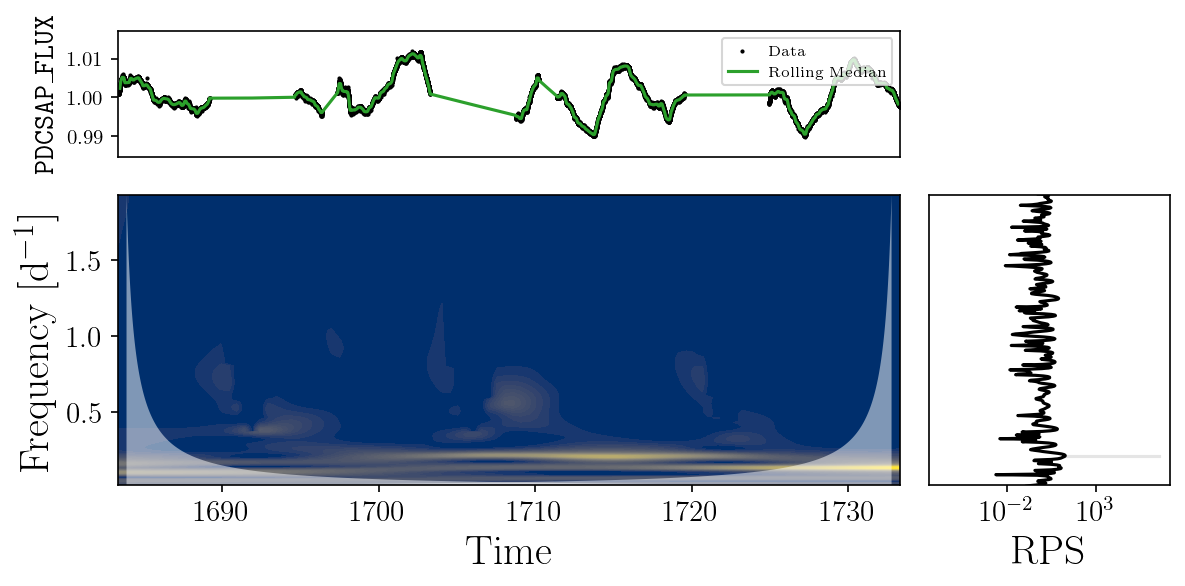

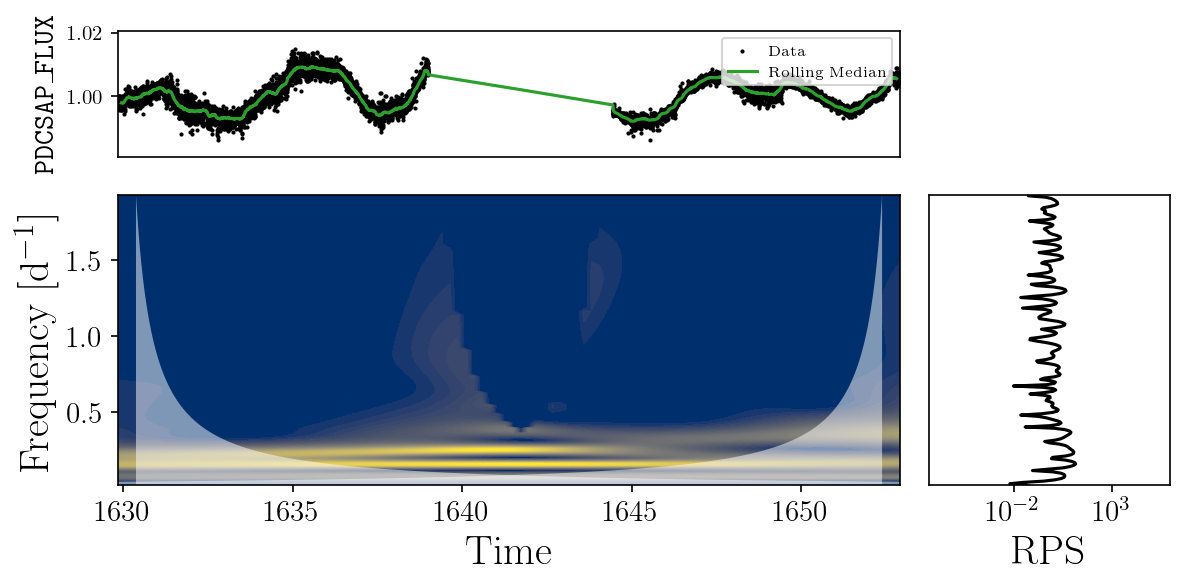

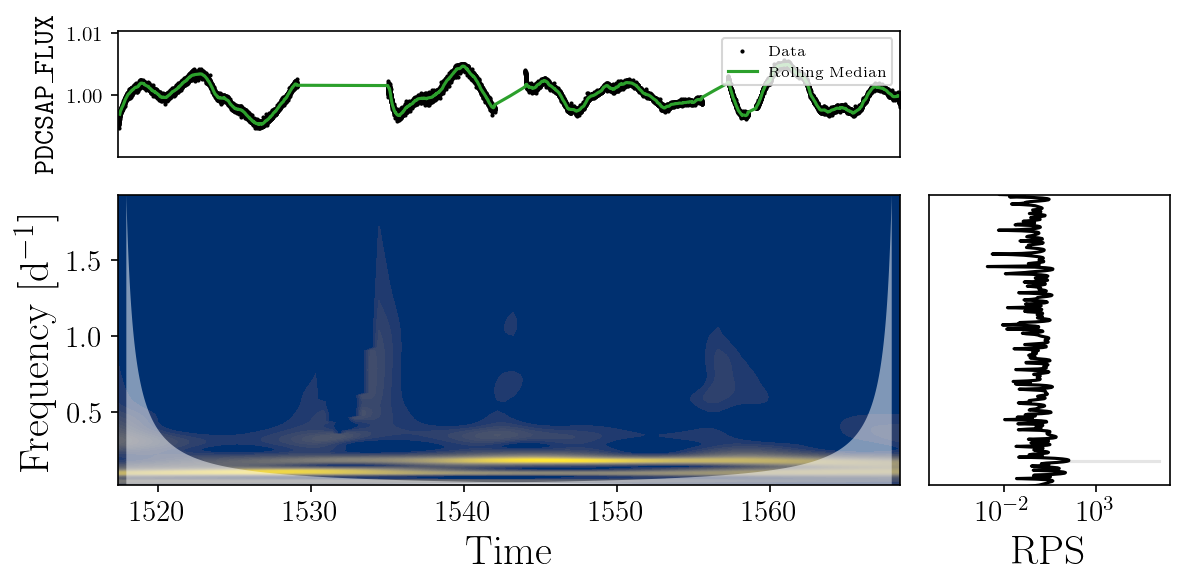

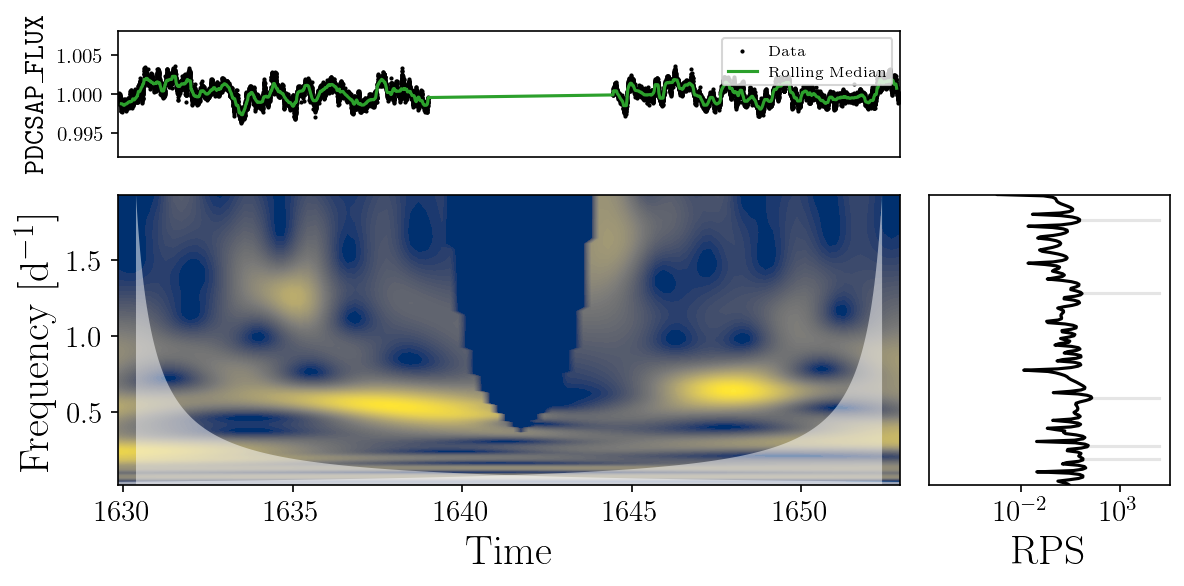

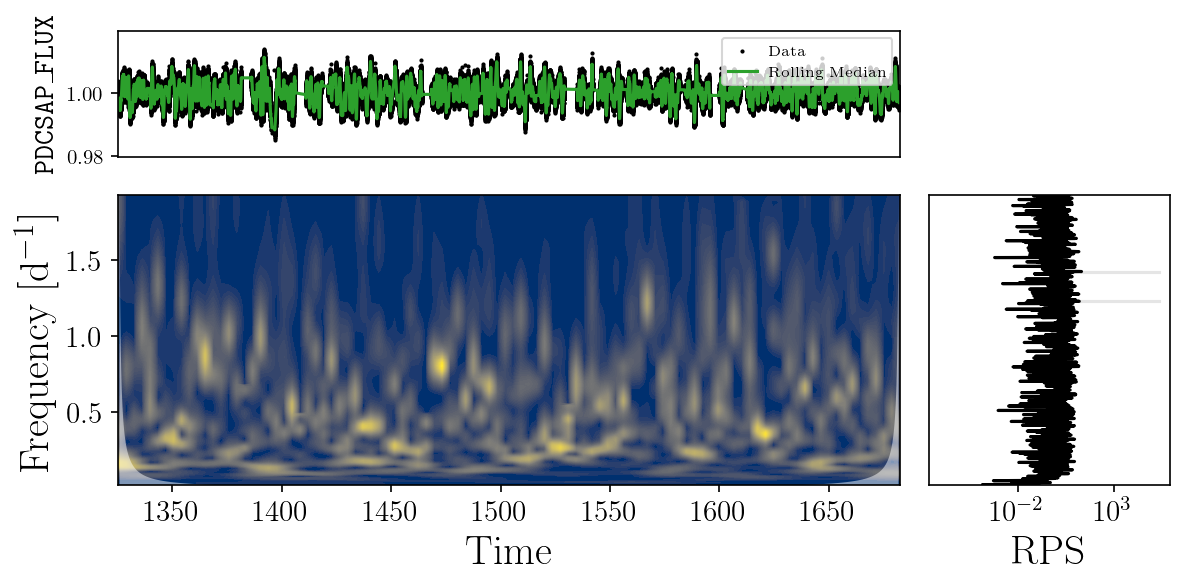

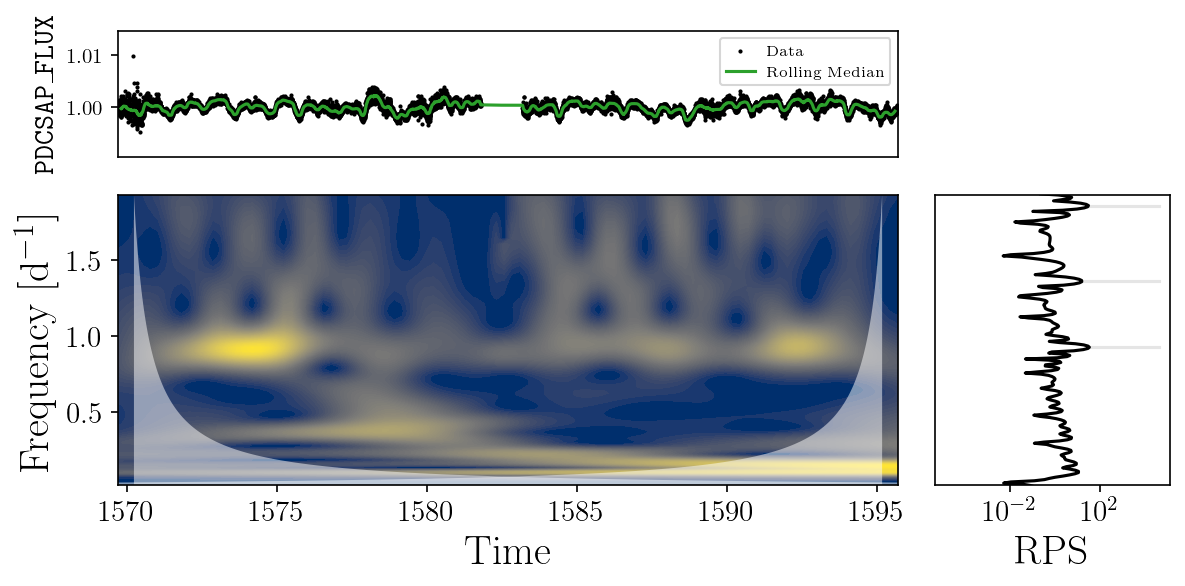

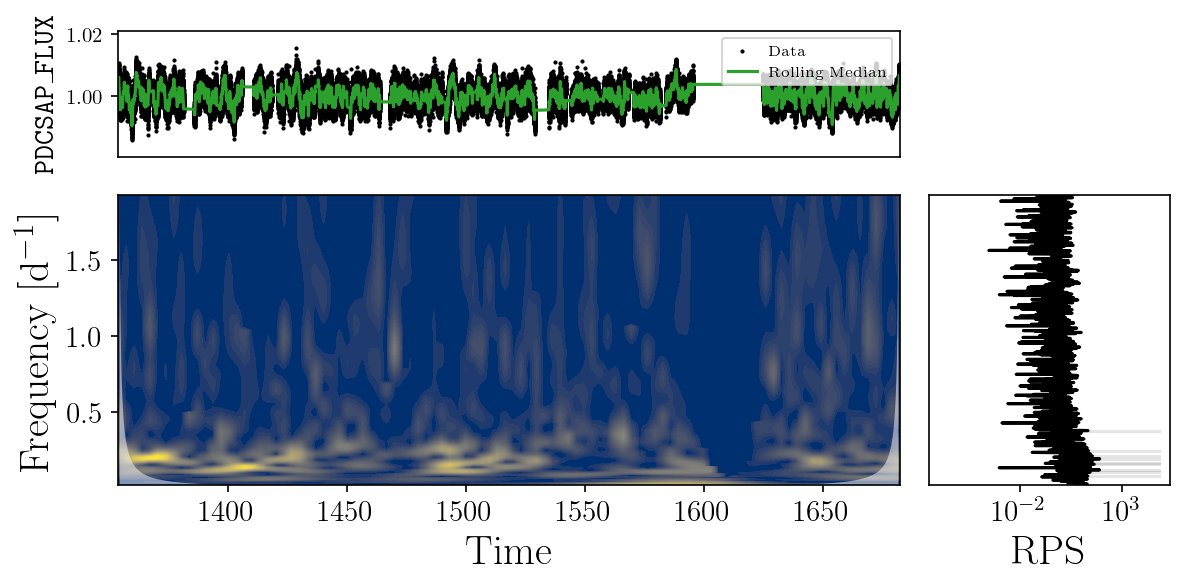

In [55]:
#Let's do a wavelet analysis!
#Let's put our functions in a list that we can loop over
func_list = [phi_1,phi_2,phi_3]
f1 = phi_1 #we're also going to need this one explicitly later
#and finally a decay constant for the Gaussian envelope
c = 0.0125
from tqdm.notebook import tqdm
for i,star in tqdm(lbvs.iterrows(),total=len(lbvs)):
    #prewhitening
    tic = star['TIC ID']
    lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)
    time, flux, err = lc['Time'], lc['Flux'], lc['Err']
    good_fs, good_amps, good_phases, good_snrs, good_peaks = prewhiten(time, flux, err, max_freq=10)
    lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)
    time, flux, err = lc['Time'], lc['Flux'], lc['Err']
    freq, power = LombScargle(time, flux, dy=err).autopower(normalization='psd')
    power /= len(time)
    popt, pcov, resid = fit_red_noise(freq, power)
    y = flux.values
    t = time.values
    omega_start = -3 #nu ~ 0.02
    omega_end = 3.6 #nu ~ 1.9
    omegas = np.logspace(omega_start,omega_end,200,base=2)
    taus = np.linspace(np.min(t),np.max(t),100)
    wwz,wwa = MP_WWZ(func_list,f1,y,t,omegas,taus,c=c)
    fig = plt.figure(constrained_layout=True,figsize=(8,4),dpi=150)

    gs = GridSpec(3, 4, figure=fig)
    lcax = fig.add_subplot(gs[0, :3])
    wwzax = fig.add_subplot(gs[1:,:3])
    zsumax = fig.add_subplot(gs[1:,3])

    lcax.scatter(time,flux,s=1,c='k',label=r'Data',rasterized=True)
    lcax.plot(lc_smooth['Time'],lc_smooth['Flux'],c='C2',label=r'Rolling Median',rasterized=True)
    lcax.set(ylabel=r'$\mathrm{\tt PDCSAP\\\_FLUX}$',xlim=(np.min(time),np.max(time)),xticks=[])
    h, l = lcax.get_legend_handles_labels()
    lcax.legend(h[::-1],l[::-1],loc='upper right',fontsize='x-small')

    wwzax.contourf(taus,omegas/2.0/np.pi,wwz,levels=100,cmap='cividis',
                   norm=colors.PowerNorm(gamma=0.5))
    wwzax.fill_between(2*np.pi/omegas+np.min(t),0,omegas/2/np.pi,alpha=0.5,facecolor='white')
    wwzax.fill_between(np.max(t)-2*np.pi/omegas,0,omegas/2/np.pi,alpha=0.5,facecolor='white')
    wwzax.set(ylabel=r'Frequency [d$^{-1}$]',xlabel='Time',
              ylim=(np.min(omegas)/2/np.pi,np.max(omegas/2/np.pi)),
              xlim=(np.min(taus),np.max(taus)))



    zsumax.semilogx(resid,freq,c='k',rasterized=True)
    zsumax.set(yticks=[],xlabel=r'RPS',
               ylim=(np.min(omegas)/2/np.pi,np.max(omegas/2/np.pi)))
    zs_lim = zsumax.get_xlim()
    for f in good_fs[:,0]:
        #wwzax.axhline(y=f,c='white',ls=':')
        zsumax.plot([zs_lim[1],resid[np.argmin(np.abs(freq-f))]],[f,f],c='k',alpha=0.1)
    for ax in [lcax,wwzax,zsumax]:
        if ax == lcax:
            ax.xaxis.label.set_size(14)
            ax.yaxis.label.set_size(14)
        else:
            ax.xaxis.label.set_size(20)
            ax.yaxis.label.set_size(20)
            for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
            for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
        plt.tight_layout()
    plt.savefig(star['CommonName']+'_wwz')

In [46]:
wwz

(200, 100)

(array([3.719e+03, 2.087e+03, 1.662e+03, 1.405e+03, 1.215e+03, 9.410e+02,
        8.420e+02, 5.900e+02, 5.210e+02, 4.200e+02, 3.650e+02, 3.300e+02,
        3.170e+02, 2.880e+02, 2.550e+02, 2.360e+02, 2.010e+02, 1.990e+02,
        1.620e+02, 1.900e+02, 1.680e+02, 1.300e+02, 1.420e+02, 1.370e+02,
        1.260e+02, 1.190e+02, 1.200e+02, 1.390e+02, 9.800e+01, 9.600e+01,
        9.300e+01, 1.010e+02, 9.700e+01, 1.040e+02, 9.300e+01, 1.040e+02,
        1.050e+02, 7.900e+01, 6.900e+01, 6.300e+01, 6.000e+01, 5.900e+01,
        6.200e+01, 5.000e+01, 4.600e+01, 5.400e+01, 5.100e+01, 6.300e+01,
        5.300e+01, 5.100e+01, 5.500e+01, 4.900e+01, 5.800e+01, 3.900e+01,
        3.900e+01, 3.300e+01, 3.100e+01, 4.400e+01, 3.700e+01, 2.900e+01,
        3.600e+01, 3.400e+01, 3.100e+01, 3.000e+01, 2.400e+01, 4.000e+01,
        2.300e+01, 2.700e+01, 2.000e+01, 2.300e+01, 2.800e+01, 1.900e+01,
        1.900e+01, 2.000e+01, 1.800e+01, 1.000e+01, 1.900e+01, 1.700e+01,
        2.200e+01, 1.700e+01, 2.000e+0

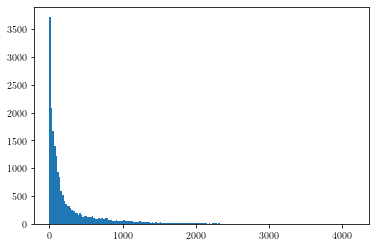

In [49]:
plt.hist(wwz.flatten(),bins='auto')

# Messing with some GP stuff with `exoplanet`

In [1]:
import pymc3 as pm
import theano.tensor as tt
from exoplanet.gp import terms, GP
from exoplanet import estimate_inverse_gamma_parameters
import exoplanet as xo

In [5]:
tic = lbvs['TIC ID'].loc[lbvs['CommonName'] == 'V* S Dor'].iloc[0]
lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)
time, flux, err = lc['Time'], lc['Flux'], lc['Err']

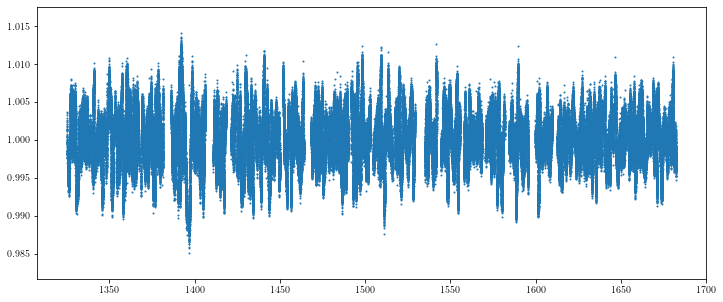

In [6]:
fig = plt.figure(figsize=(12,5))
plt.scatter(time, flux,s=1)

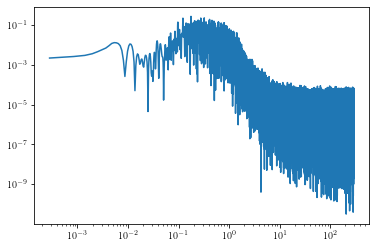

In [7]:
ls = LombScargle(time, flux, dy=err, normalization='psd')
freq, power = ls.autopower(nyquist_factor=1)
power /= len(time)
plt.loglog(freq,power)

In [8]:
popt, pcov, resid = fit_red_noise(freq,power)
alpha_0, tau, gamma, alpha_w = popt
s0 = alpha_0
w0 = 2*np.pi/tau
print(s0,w0,np.log(s0))

0.19766700436578047 25.895928602458817 -1.6211714602267608


def twinSHO_PSD(f, S1, S2, w1, w2, Q):
    w = 2.0*np.pi*f
    
    prefac = np.sqrt(2.0/np.pi)
    
    Q1 = 1.0/np.sqrt(2.0)
    Q2 = Q
    S10 = S1/(w1*Q1)
    S20 = S2/(w2*Q2)
    
    num1 = S10 * (w1**4.0)
    num2 = S20 * (w2**4.0)
    
    den1 = ((w**2.0 - w1**2.0)**2.0) + ((w*w1/Q1)**2.0)
    den2 = ((w**2.0 - w2**2.0)**2.0) + ((w*w2/Q2)**2.0)
    
    return prefac * ((num1/den1) + (num2/den2))

def log_SHO(f, S1, S2, w1, w2, Q):
    return np.log10(twinSHO_PSD(f, S1, S2, w1, w2, Q))

test_PSD = twinSHO_PSD(freq, 0.1*s0, 0.075*s0, 1/tau, 2*np.pi/tau, 0.01)
plt.loglog(freq, power)
plt.loglog(freq, test_PSD)

bounds = ([0, 0, 0, 0, 0],[np.inf, np.inf, 5e1, 5e1, np.inf])
popt, pcov = curve_fit(twinSHO_PSD, freq, power, p0 = (0.1*s0, 0.075*s0, 1/tau, 2*np.pi/tau, 0.01), bounds=bounds)

plt.loglog(freq, power)
plt.loglog(freq, twinSHO_PSD(freq, *popt))
popt

### things to try:
1. ~single SHO, then let Q vary, then more~ same problem
2. ~Add gaussian noise to the data~ same problem, or it just doesn't converge
3. ~try flat priors~ same problem
4. ~manually tweak power spectrum parameters~ still moves away from them
5. Multiple SHOs

### How many SHOs will it take to get a suitable fit?

In [40]:
def calc_BIC_nSHOs(time, flux, err, n=1):
    with pm.Model() as model:
        mean = pm.Normal("mean", mu=1.0, sigma=np.std(flux))
        
        S1 = pm.HalfFlat(f"S{0}")
        logw1 = pm.Deterministic(f"logw{0}", pm.HalfFlat(f'logwp2{0}') - 2)
        Q1 = pm.HalfFlat(f"Q{0}")
        
        kernel = terms.SHOTerm(S_tot = S1, log_w0=logw1, Q=Q1)
        
        for i in range(1,n):
            S = pm.HalfFlat(f"S{i}")
            logw = pm.Deterministic(f"logw{i}", pm.HalfFlat(f'logwp2{i}') - 2)
            Q = pm.HalfFlat(f"Q{i}")
            
            kernel += terms.SHOTerm(S_tot = S, log_w0=logw, Q=Q)
        
        gp = GP(kernel, time, err ** 2, mean=mean)

        # Condition the GP on the observations and add the marginal likelihood
        # to the model
        gp.marginal("gp", observed=flux)
              
        map_soln = xo.optimize(start=model.test_point)
        logprob = model.logp(map_soln)#xo.eval_in_model(model.logp, map_soln)

        npar = 3.0*n

        bic = -2.0*logprob + npar*np.log(len(time))
        
    return bic

In [42]:
ns = np.arange(10)+1
bics = [calc_BIC_nSHOs(time, flux, err, n=n) for n in ns]

optimizing logp for variables: [Q0, logwp20, S0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 1205244.403912384 -> 1213911.1179766566
optimizing logp for variables: [Q1, logwp21, S1, Q0, logwp20, S0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 1202220.7119735472 -> 1213911.2595894122
optimizing logp for variables: [Q2, logwp22, S2, Q1, logwp21, S1, Q0, logwp20, S0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 1200184.3539890293 -> 1213194.3856670037
optimizing logp for variables: [Q3, logwp23, S3, Q2, logwp22, S2, Q1, logwp21, S1, Q0, logwp20, S0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 1198605.4871607244 -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model


optimizing logp for variables: [Q4, logwp24, S4, Q3, logwp23, S3, Q2, logwp22, S2, Q1, logwp21, S1, Q0, logwp20, S0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 1197297.8123834792 -> 1213199.2710601448
optimizing logp for variables: [Q5, logwp25, S5, Q4, logwp24, S4, Q3, logwp23, S3, Q2, logwp22, S2, Q1, logwp21, S1, Q0, logwp20, S0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 1196172.095406303 -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model


optimizing logp for variables: [Q6, logwp26, S6, Q5, logwp25, S5, Q4, logwp24, S4, Q3, logwp23, S3, Q2, logwp22, S2, Q1, logwp21, S1, Q0, logwp20, S0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 1195178.0736588617 -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model


optimizing logp for variables: [Q7, logwp27, S7, Q6, logwp26, S6, Q5, logwp25, S5, Q4, logwp24, S4, Q3, logwp23, S3, Q2, logwp22, S2, Q1, logwp21, S1, Q0, logwp20, S0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 1194284.3938356163 -> 1213175.324350507
optimizing logp for variables: [Q8, logwp28, S8, Q7, logwp27, S7, Q6, logwp26, S6, Q5, logwp25, S5, Q4, logwp24, S4, Q3, logwp23, S3, Q2, logwp22, S2, Q1, logwp21, S1, Q0, logwp20, S0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 1193470.0647447885 -> 1213157.4448170064
optimizing logp for variables: [Q9, logwp29, S9, Q8, logwp28, S8, Q7, logwp27, S7, Q6, logwp26, S6, Q5, logwp25, S5, Q4, logwp24, S4, Q3, logwp23, S3, Q2, logwp22, S2, Q1, logwp21, S1, Q0, logwp20, S0, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 1192720.2814519396 -> 1213232.0659761836


In [48]:
ns[np.argmin(bics)]

1

In [49]:
with pm.Model() as model:
    mean = pm.Normal("mean", mu=1.0, sigma=np.std(flux))

    S1 = pm.HalfFlat(f"S{0}")
    logw1 = pm.Deterministic(f"logw{0}", pm.HalfFlat(f'logwp2{0}') - 2)
    Q1 = pm.HalfFlat(f"Q{0}")

    kernel = terms.SHOTerm(S_tot = S1, log_w0=logw1, Q=Q1)

    """for i in range(1,6):
        S = pm.HalfFlat(f"S{i}")
        logw = pm.Deterministic(f"logw{i}", pm.HalfFlat(f'logwp2{i}') - 2)
        Q = pm.HalfFlat(f"Q{i}")

        kernel += terms.SHOTerm(S_tot = S, log_w0=logw, Q=Q)
"""
    gp = GP(kernel, time, err ** 2, mean=mean)

    # Condition the GP on the observations and add the marginal likelihood
    # to the model
    gp.marginal("gp", observed=flux)

In [50]:
with model:
    print(model.test_point)
    map_soln = xo.optimize(start=model.test_point)
    print(map_soln)

{'mean': array(1.), 'S0_log__': array(0.), 'logwp20_log__': array(0.), 'Q0_log__': array(0.)}


optimizing logp for variables: [Q0, logwp20, S0, mean]



{'mean': array(1.00005951), 'S0_log__': array(-11.36522101), 'logwp20_log__': array(1.28169347), 'Q0_log__': array(0.13667479), 'S0': array(1.15917025e-05), 'logwp20': array(3.60273568), 'logw0': array(1.60273568), 'Q0': array(1.14645525)}


message: Desired error not necessarily achieved due to precision loss.
logp: 1205244.403912384 -> 1213911.1179766566


In [60]:
with model:
    step = pm.NUTS(target_accept=0.9)
    trace = pm.sample(
        tune=1000,
        draws=3000,
        cores=4,
        chains=2,
        step=step
    )

Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Q0, logwp20, S0, mean]
Sampling 2 chains: 100%|██████████| 8000/8000 [50:03<00:00,  2.66draws/s]  


In [62]:
pm.summary(trace)

/Users/carina/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mean,1.000057,1.153513e-04,1.466162e-06,0.999840,1.000286,5213.330653,0.999855
S0,0.000012,6.074895e-07,9.283382e-09,0.000011,0.000013,3530.464531,0.999834
logwp20,3.601363,1.742937e-02,2.674467e-04,3.566589,3.635899,3844.131286,0.999834
logw0,1.601363,1.742937e-02,2.674467e-04,1.566589,1.635899,3844.131286,0.999834
Q0,1.148114,5.911555e-02,8.774824e-04,1.034710,1.263700,4275.137064,0.999849


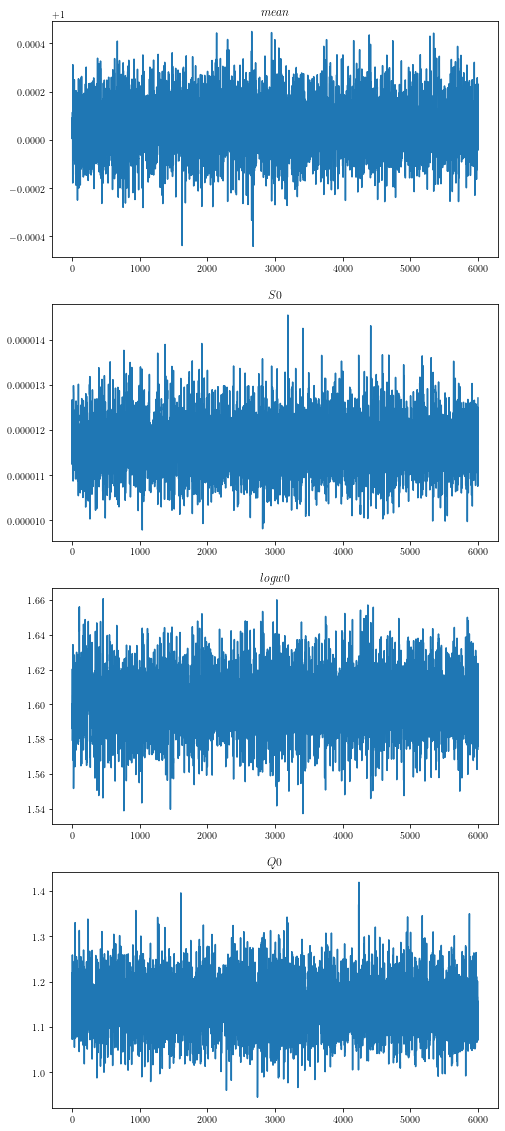

In [63]:
samples = pm.trace_to_dataframe(
    trace, varnames=["mean","S0","logw0","Q0"]
)
fig, ax = plt.subplots(len(samples.columns),figsize=(8,20))
for a, col in zip(ax,samples.columns):
    a.plot(samples[col],label=col)
    a.set_title(r'${}$'.format(col))

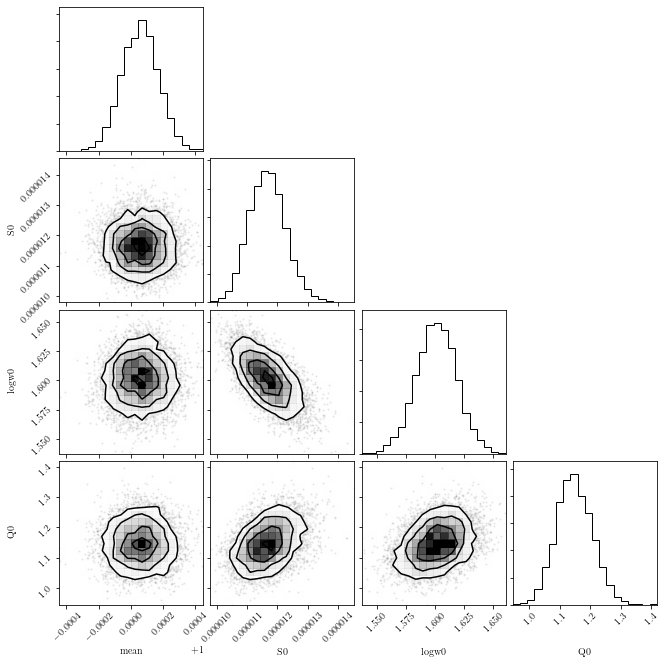

In [64]:
import corner

_ = corner.corner(samples)

In [ ]:
from tqdm.notebook import tqdm

# Generate 50 realizations of the prediction sampling randomly from the chain
N_pred = 50
pred_t = time[(time >= 1350)&(time <= 1450)]

pred_mu = np.empty((N_pred, len(pred_t)))
pred_var = np.empty((N_pred, len(pred_t)))
pred_psd = np.empty((N_pred, len(freq)))

with model:
    pred = gp.predict(pred_t, return_var=True, predict_mean=True)
    psd = kernel.psd(2*np.pi*freq)
    for i, sample in tqdm(enumerate(xo.get_samples_from_trace(trace, size=N_pred))):
        pred_mu[i], pred_var[i] = xo.eval_in_model(pred, sample)
        pred_psd[i] = xo.eval_in_model(psd, sample)

In [ ]:
fig, ax = plt.subplots(2, figsize=(12,10))

# Plot the predictions
for i in range(len(pred_mu)):
    mu = pred_mu[i]
    sd = np.sqrt(pred_var[i])
    ps = pred_psd[i]
    label = None if i else "prediction"
    art = ax[0].fill_between(pred_t, mu + sd, mu - sd, color="C1", alpha=0.1)
    art.set_edgecolor("none")
    ax[0].plot(pred_t, mu, color="C1", label=label, alpha=0.1)
    
    ax[1].plot(freq, ps, color='C1', alpha=0.1)

ax[0].scatter(time, flux, s=1, c="k", label="data")
ax[1].plot(freq, power, c='k', label='data')

### Single SHO, Q frozen

In [18]:
with pm.Model() as model:

    mean = pm.Normal("mean", mu=1.0, sigma=np.std(flux))
    """S1 = pm.InverseGamma(
        "S1", **estimate_inverse_gamma_parameters(0.1*s0, np.max(power))
    )
    logw1 = pm.InverseGamma(
        "logw1", **estimate_inverse_gamma_parameters(np.log(w0)-3, np.log(w0))
    )"""
    S1 = pm.HalfFlat("S1")
    logw1 = pm.HalfFlat("logw1")
    # Set up the kernel an GP
    kernel = terms.SHOTerm(S_tot=S1, log_w0=logw1, Q=1.0 / np.sqrt(2))
    gp = GP(kernel, time, err ** 2, mean=mean)

    # Condition the GP on the observations and add the marginal likelihood
    # to the model
    gp.marginal("gp", observed=flux)


In [98]:
import exoplanet as xo

with model:
    print(model.test_point)
    map_soln = xo.optimize(start=model.test_point, method='Nelder-Mead')
    print(map_soln)

{'mean': array(1.), 'S1_log__': array(0.), 'logw1_log__': array(0.)}


optimizing logp for variables: [logw1, S1, mean]



{'mean': array(1.00006867), 'S1_log__': array(-11.37888867), 'logw1_log__': array(0.40814395), 'S1': array(1.14343489e-05), 'logw1': array(1.50402365)}


message: Optimization terminated successfully.
logp: 1142393.9968436477 -> 1213859.2167548942


In [103]:
with model:
    p = xo.eval_in_model(
        kernel.psd(2*np.pi*freq), map_soln 
    )
    p_i = xo.eval_in_model(
        kernel.psd(2*np.pi*freq), {'mean':1, 'S1':s0, 'S1_log__':np.log(s0), 'logw1':np.log(0.1*w0), 'logw1_log__':np.log(np.log(0.1*w0))}
    )

In [ ]:
with model:
    pred = gp.predict(time, return_var=True, predict_mean=True)
    mu, var = xo.eval_in_model(pred, map_soln)

(0.95, 1.05)

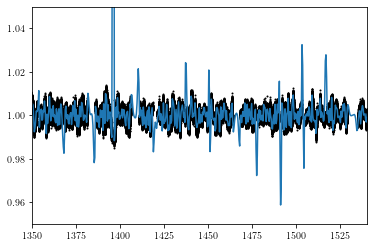

In [111]:
plt.plot(mod_t, pred_mu)
plt.scatter(time, flux,s=1,c='k')
plt.xlim(1350,1540)
plt.ylim(0.95,1.05)

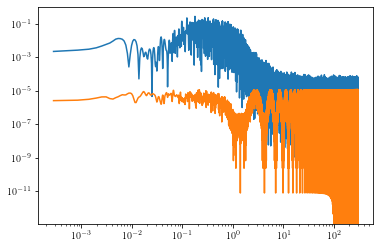

In [109]:
#plt.plot(mod_t, pred_mu[pred_mu != 0])
ls_pred = LombScargle(mod_t, pred_mu)
pow_pred = ls_pred.power(freq)
pow_pred /= len(mod_t)
plt.loglog(freq, power)
plt.loglog(freq, pow_pred)

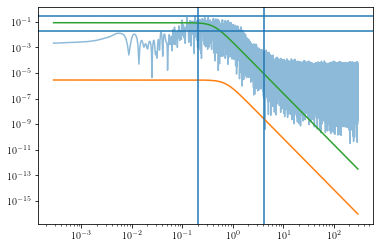

In [104]:
plt.loglog(freq,power,alpha=0.5)
plt.loglog(freq,p)
plt.loglog(freq,p_i)
plt.axvline(w0/2/np.pi)
plt.axvline(np.exp(-3)*w0/2/np.pi)
plt.axhline(0.1*s0)
plt.axhline(np.max(power))

In [23]:
mod_t = np.linspace(time.min(),time.max(),1000)
with model:
    mu, var = xo.eval_in_model(
        gp.predict(mod_t, return_var=True, predict_mean=True), map_soln
    )

(1350, 1450)

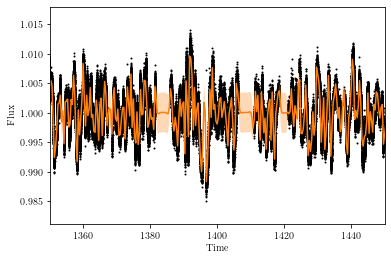

In [24]:
plt.scatter(time, flux, c="k", s=1)

# Plot the prediction and the 1-sigma uncertainty
sd = np.sqrt(var)
art = plt.fill_between(mod_t, mu + sd, mu - sd, color="C1", alpha=0.3)
art.set_edgecolor("none")
plt.plot(mod_t, mu, color="C1", label="prediction")

plt.xlabel("Time")
plt.ylabel("Flux")
plt.xlim(1350, 1450)

In [25]:
with model:
    trace = pm.sample(
        tune=20,
        draws=40,
        cores=2,
        chains=2,
        step=xo.get_dense_nuts_step(target_accept=0.95),
    )

Only 40 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w1, S1, mean]
Sampling 2 chains: 100%|██████████| 120/120 [02:01<00:00,  1.02s/draws]
/Users/carina/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:464: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


In [27]:
#pm.traceplot(trace)
pm.summary(trace)

/Users/carina/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mean,1.001125,0.003077,0.000428,0.997653,1.009311,37.735763,0.989929
S1,0.016228,0.026035,0.004008,0.000550,0.075848,3.037986,1.369976
w1,0.017429,0.015115,0.002333,0.001314,0.048419,5.227987,1.085282


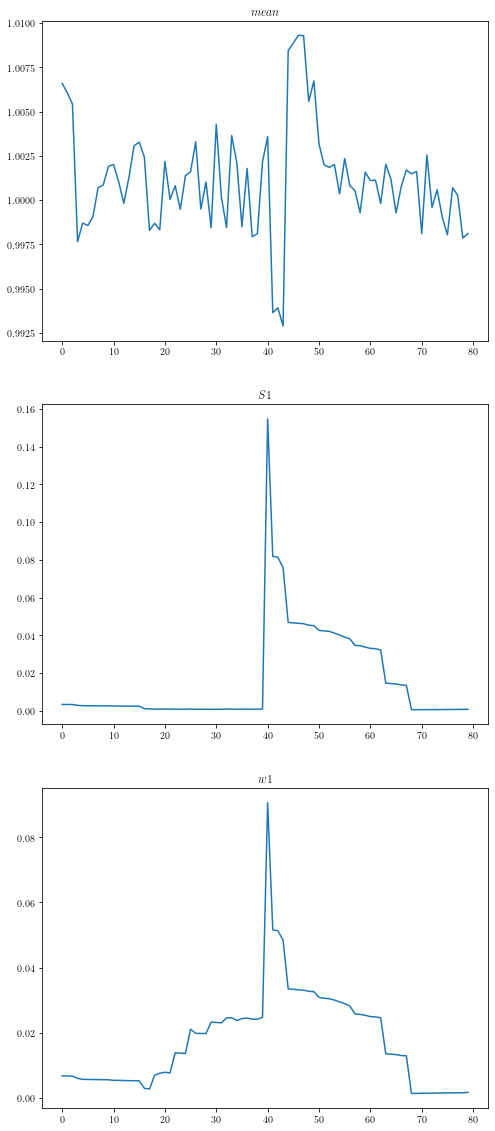

In [29]:
samples = pm.trace_to_dataframe(
    trace, varnames=["mean","S1", "w1"]
)
fig, ax = plt.subplots(len(samples.columns),figsize=(8,20))
for a, col in zip(ax,samples.columns):
    a.plot(samples[col],label=col)
    a.set_title(r'${}$'.format(col))

### Trying to add Gaussian noise

(1350, 1450)

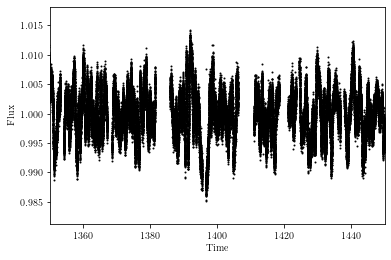

In [45]:
flux_noised = flux + 0.2*np.std(flux)*np.random.randn(len(flux))
plt.scatter(time, flux_noised, c="k", s=1)

plt.xlabel("Time")
plt.ylabel("Flux")
plt.xlim(1350, 1450)

In [46]:
with pm.Model() as model:

    mean = pm.Normal("mean", mu=1.0, sigma=np.std(flux))
    """S1 = pm.InverseGamma(
        "S1", **estimate_inverse_gamma_parameters(0.1*s0, np.max(power))
    )
    logw1 = pm.InverseGamma(
        "logw1", **estimate_inverse_gamma_parameters(np.log(w0)-3, np.log(w0))
    )"""
    S1 = pm.HalfFlat("S1")
    logw1 = pm.HalfFlat("logw1")
    # Set up the kernel an GP
    kernel = terms.SHOTerm(S_tot=S1, log_w0=logw1, Q=1.0 / np.sqrt(2))
    gp = GP(kernel, time, err ** 2, mean=mean)

    # Condition the GP on the observations and add the marginal likelihood
    # to the model
    gp.marginal("gp", observed=flux_noised)

In [47]:
with model:
    print(model.test_point)
    map_soln = xo.optimize(start=model.test_point)
    print(map_soln)

{'mean': array(1.), 'S1_log__': array(0.), 'logw1_log__': array(0.)}


optimizing logp for variables: [logw1, S1, mean]



{'mean': array(1.0000738), 'S1_log__': array(-11.39055391), 'logw1_log__': array(0.5252132), 'S1': array(1.13017394e-05), 'logw1': array(1.6908193)}


message: Desired error not necessarily achieved due to precision loss.
logp: 1062694.0675135672 -> 1107593.770915452


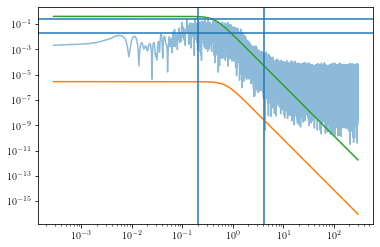

In [36]:
plt.loglog(freq,power,alpha=0.5)
plt.loglog(freq,p)
plt.loglog(freq,p_i)
plt.axvline(w0/2/np.pi)
plt.axvline(np.exp(-3)*w0/2/np.pi)
plt.axhline(0.1*s0)
plt.axhline(np.max(power))

In [23]:
mod_t = np.linspace(time.min(),time.max(),1000)
with model:
    mu, var = xo.eval_in_model(
        gp.predict(mod_t, return_var=True, predict_mean=True), map_soln
    )

(1350, 1450)

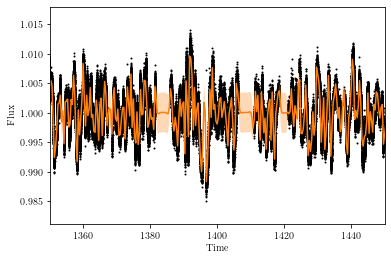

In [24]:
plt.scatter(time, flux, c="k", s=1)

# Plot the prediction and the 1-sigma uncertainty
sd = np.sqrt(var)
art = plt.fill_between(mod_t, mu + sd, mu - sd, color="C1", alpha=0.3)
art.set_edgecolor("none")
plt.plot(mod_t, mu, color="C1", label="prediction")

plt.xlabel("Time")
plt.ylabel("Flux")
plt.xlim(1350, 1450)

### Matern-3/2?

In [85]:
with pm.Model() as model:

    mean = pm.Normal("mean", mu=1.0, sigma=np.std(flux))
    sigma = pm.HalfNormal("sigma",sigma=1)
    rho = pm.HalfNormal("rho",sigma=2)
    # Set up the kernel an GP
    kernel = terms.Matern32Term(sigma=sigma, rho=rho)
    gp = GP(kernel, time, err ** 2, mean=mean)

    # Condition the GP on the observations and add the marginal likelihood
    # to the model
    gp.marginal("gp", observed=flux)

In [86]:
import exoplanet as xo

with model:
    print(model.test_point)
    map_soln = xo.optimize(start=model.test_point, method = 'Nelder-Mead')
    print(map_soln)

{'mean': array(1.), 'sigma_log__': array(-0.22579135), 'rho_log__': array(0.46735583)}


optimizing logp for variables: [rho, sigma, mean]


/Users/carina/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:500: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)



{'mean': array(1.00007927), 'sigma_log__': array(-5.53083101), 'rho_log__': array(-0.77294316), 'sigma': array(0.00396269), 'rho': array(0.46165235)}


message: Optimization terminated successfully.
logp: 1183030.0767724921 -> 1213764.8800684956


In [87]:
with model:
    p = xo.eval_in_model(
        kernel.psd(2*np.pi*freq), map_soln
    )
    p_i = xo.eval_in_model(
        kernel.psd(2*np.pi*freq), {'mean':1, 'sigma':0.2, 'rho':0.5, 'sigma_log__': np.log(0.2), 'rho_log__':np.log(0.5)}
    )

In [89]:
N_pred = 50
pred_mu = np.empty((N_pred, len(mod_t)))
with model:
    pred = gp.predict(mod_t, return_var=False, predict_mean=True)
    pred_mu[] = xo.eval_in_model(pred, map_soln)

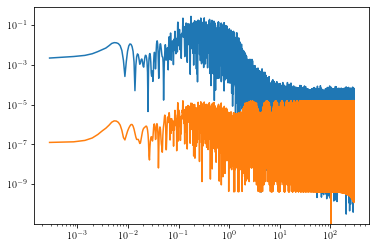

In [95]:
#plt.plot(mod_t, pred_mu[pred_mu != 0])
ls_pred = LombScargle(mod_t, pred_mu[pred_mu != 0])
pow_pred = ls_pred.power(freq)
pow_pred /= len(mod_t)
plt.loglog(freq, power)
plt.loglog(freq, pow_pred)

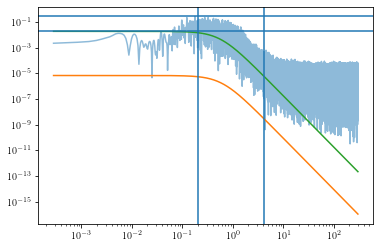

In [88]:
plt.loglog(freq,power,alpha=0.5)
plt.loglog(freq,p)
plt.loglog(freq,p_i)
plt.axvline(w0/2/np.pi)
plt.axvline(np.exp(-3)*w0/2/np.pi)
plt.axhline(0.1*s0)
plt.axhline(np.max(power))

In [61]:
with model:
    mu, var = xo.eval_in_model(
        gp.predict(mod_t, return_var=True, predict_mean=True), map_soln
    )

(1350, 1450)

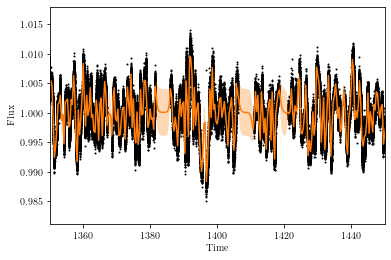

In [62]:
plt.scatter(time, flux, c="k", s=1)

# Plot the prediction and the 1-sigma uncertainty
sd = np.sqrt(var)
art = plt.fill_between(mod_t, mu + sd, mu - sd, color="C1", alpha=0.3)
art.set_edgecolor("none")
plt.plot(mod_t, mu, color="C1", label="prediction")

plt.xlabel("Time")
plt.ylabel("Flux")
plt.xlim(1350, 1450)

In [63]:
with model:
    trace = pm.sample(
        tune=20,
        draws=40,
        cores=2,
        chains=2,
        step=xo.get_dense_nuts_step(target_accept=0.95),
    )

Only 40 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rho, sigma, mean]
Sampling 2 chains: 100%|██████████| 120/120 [01:19<00:00,  1.51draws/s]
/Users/carina/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:464: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


In [64]:
#pm.traceplot(trace)
pm.summary(trace)

/Users/carina/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mean,1.000274,0.003288,0.000372,0.994784,1.007296,41.961158,0.988108
sigma,0.171655,0.127672,0.020142,0.018928,0.417225,1.390141,2.395332
rho,4.605090,2.315005,0.364270,1.399555,7.876513,1.953434,1.693518


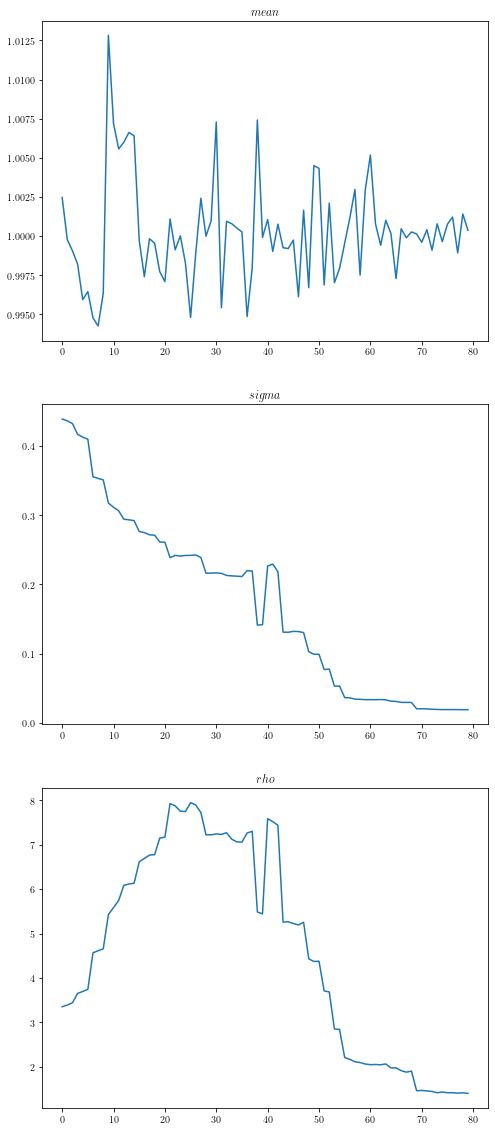

In [65]:
samples = pm.trace_to_dataframe(
    trace, varnames=["mean","sigma", "rho"]
)
fig, ax = plt.subplots(len(samples.columns),figsize=(8,20))
for a, col in zip(ax,samples.columns):
    a.plot(samples[col],label=col)
    a.set_title(r'${}$'.format(col))

In [154]:
import pymc3 as pm
import theano.tensor as tt
from exoplanet.gp import terms, GP
from exoplanet import estimate_inverse_gamma_parameters

with pm.Model() as model:

    mean = pm.Normal("mean", mu=1.0, sigma=np.std(flux))
    """
    S1 = pm.InverseGamma(
        "S1", **estimate_inverse_gamma_parameters(0.1*s0, np.max(power))
    )
    S2 = pm.InverseGamma(
        "S2", **estimate_inverse_gamma_parameters(0.1*s0, np.max(power))
    )
    logw1 = pm.InverseGamma(
        "logw1", **estimate_inverse_gamma_parameters(np.log(w0)-3, np.log(w0))
    )
    logw2 = pm.InverseGamma(
        "logw2", **estimate_inverse_gamma_parameters(np.log(w0)-3, np.log(w0))
    )"""
    S1 = pm.Uniform("S1", lower=1e-9, upper=0.1)
    S2 = pm.Uniform("S2", lower=1e-9, upper=0.1)
    logw1 = pm.Uniform("logw1", lower=np.log(2*np.pi*0.1), upper=np.log(2*np.pi*10))
    logw2 = pm.Uniform("logw2", lower=np.log(2*np.pi*0.1), upper=np.log(2*np.pi*10))
    log_Q = pm.Uniform("log_Q", lower=np.log(2e-4), upper=np.log(20))

    # Set up the kernel an GP
    kernel = terms.SHOTerm(S_tot=S1, log_w0=logw1, Q=1.0 / np.sqrt(2))
    kernel += terms.SHOTerm(S_tot=S2, log_w0=logw2, log_Q=log_Q)
    gp = GP(kernel, time, err ** 2, mean=mean)

    # Condition the GP on the observations and add the marginal likelihood
    # to the model
    gp.marginal("gp", observed=flux)

In [155]:
import exoplanet as xo

with model:
    print(model.test_point)
    map_soln = xo.optimize(start=model.test_point)
    print(map_soln)

{'mean': array(1.), 'S1_interval__': array(0.), 'S2_interval__': array(0.), 'logw1_interval__': array(0.), 'logw2_interval__': array(0.), 'log_Q_interval__': array(-2.22044605e-16)}


optimizing logp for variables: [log_Q, logw2, logw1, S2, S1, mean]



{'mean': array(1.00006096), 'S1_interval__': array(-9.88699063), 'S2_interval__': array(-9.65893199), 'logw1_interval__': array(-0.49722431), 'logw2_interval__': array(-0.06737266), 'log_Q_interval__': array(1.22631575), 'S1': array(5.08391033e-06), 'S2': array(6.38586035e-06), 'logw1': array(1.27693596), 'logw2': array(1.76034075), 'log_Q': array(0.38429101)}


message: Desired error not necessarily achieved due to precision loss.
logp: 1100672.0632022296 -> 1213902.742334399


In [156]:
with model:
    p = xo.eval_in_model(
        kernel.psd(2*np.pi*freq), map_soln 
    )
    p_i = xo.eval_in_model(
        kernel.psd(2*np.pi*freq), model.test_point
    )
    print(xo.eval_in_model(
        [kernel.terms[1].Q,kernel.terms[1].w0,kernel.terms[0].w0], model.test_point
    ))
    
    print(xo.eval_in_model(
        [kernel.terms[1].Q,kernel.terms[1].w0,kernel.terms[0].w0], map_soln
    ))

[array(0.06324555), array(6.28318531), array(6.28318531)]
[array(1.46857275), array(5.81441835), array(3.58563636)]


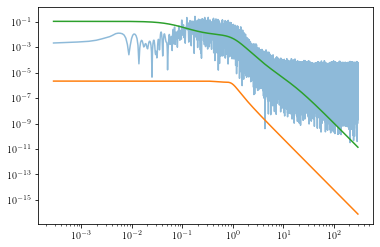

In [157]:
plt.loglog(freq,power,alpha=0.5)
plt.loglog(freq,p)
plt.loglog(freq,p_i)

In [158]:
mod_t = np.linspace(time.min(),time.max(),1000)
with model:
    mu, var = xo.eval_in_model(
        gp.predict(mod_t, return_var=True, predict_mean=True), map_soln
    )

(1350, 1450)

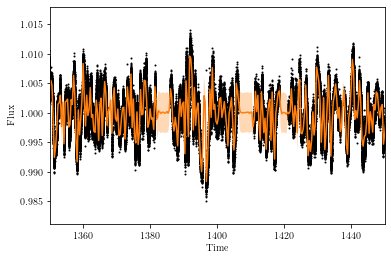

In [159]:
plt.scatter(time, flux, c="k", s=1)

# Plot the prediction and the 1-sigma uncertainty
sd = np.sqrt(var)
art = plt.fill_between(mod_t, mu + sd, mu - sd, color="C1", alpha=0.3)
art.set_edgecolor("none")
plt.plot(mod_t, mu, color="C1", label="prediction")

plt.xlabel("Time")
plt.ylabel("Flux")
plt.xlim(1350, 1450)

In [160]:
with model:
    trace = pm.sample(
        tune=20,
        draws=40,
        cores=2,
        chains=2,
        step=xo.get_dense_nuts_step(target_accept=0.95),
    )

Only 40 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [log_Q, logw2, logw1, S2, S1, mean]
Sampling 2 chains: 100%|██████████| 120/120 [08:39<00:00,  4.33s/draws]
/Users/carina/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:464: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


In [161]:
#pm.traceplot(trace)
pm.summary(trace)

/Users/carina/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mean,0.999610,0.003485,0.000433,0.992171,1.005227,24.250734,1.090471
S1,0.023130,0.015143,0.002377,0.000063,0.040260,2.982547,1.431885
S2,0.029026,0.014041,0.002205,0.000034,0.040291,2.746294,1.489950
logw1,-0.108374,0.368212,0.056995,-0.460777,0.713696,8.234783,1.000535
logw2,-0.169858,0.194754,0.029616,-0.452877,0.134208,9.306796,1.014748
log_Q,1.832900,0.608031,0.093133,1.156596,2.875834,7.941463,1.061474


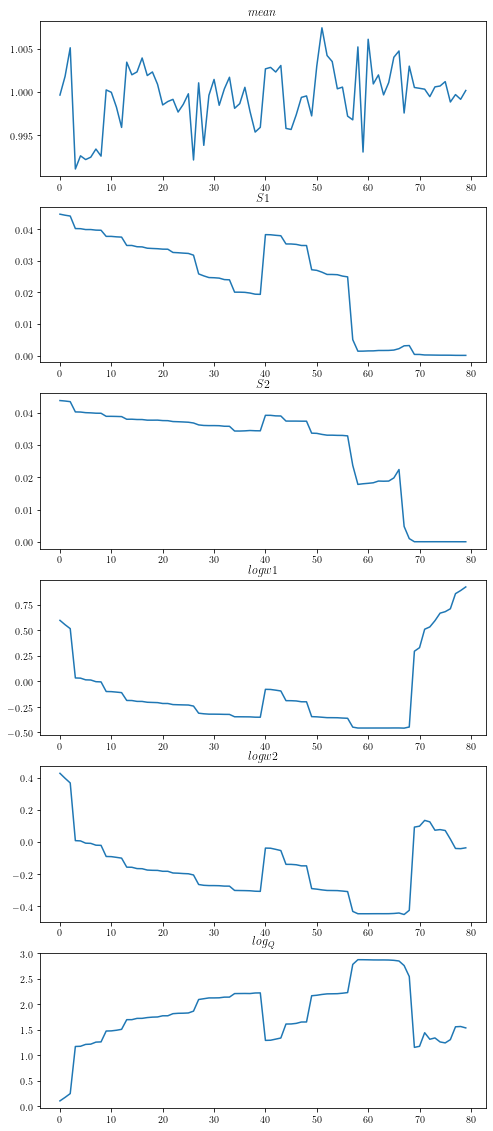

In [162]:
samples = pm.trace_to_dataframe(
    trace, varnames=["mean","S1", "S2", "logw1", "logw2", "log_Q"]
)
fig, ax = plt.subplots(6,figsize=(8,20))
for a, col in zip(ax,samples.columns):
    a.plot(samples[col],label=col)
    a.set_title(r'${}$'.format(col))

In [163]:
with pm.Model() as model_rot:

    mean = pm.Normal("mean", mu=1.0, sigma=np.std(flux))
    amp = pm.InverseGamma(
        "amp", **estimate_inverse_gamma_parameters(0.1*s0, 10*s0)
    )
    period = pm.InverseGamma(
        "period", **estimate_inverse_gamma_parameters(0.1, 10)
    )
    log_Q0 = pm.Uniform("log_Q", lower=np.log(2), upper=np.log(10))
    log_deltaQ = pm.Uniform("log_deltaQ", lower=np.log(1e-3), upper=np.log(10))
    mix = pm.Uniform("mix", lower=0.001, upper=0.999)

    # Set up the kernel an GP
    kernel_rot = terms.RotationTerm(amp=amp, period=period, log_Q0=log_Q0, log_deltaQ=log_deltaQ, mix=mix)
    gp_rot = GP(kernel_rot, time, err ** 2, mean=mean)

    # Condition the GP on the observations and add the marginal likelihood
    # to the model
    gp_rot.marginal("gp", observed=flux)

In [164]:
with model_rot:
    print(model_rot.test_point)
    map_soln_rot = xo.optimize(start=model_rot.test_point)
    print(map_soln_rot)

{'mean': array(1.), 'amp_log__': array(-3.10416849), 'period_log__': array(-1.48299703), 'log_Q_interval__': array(1.38777878e-16), 'log_deltaQ_interval__': array(0.), 'mix_interval__': array(0.)}


optimizing logp for variables: [mix, log_deltaQ, log_Q, period, amp, mean]



{'mean': array(1.00007236), 'amp_log__': array(-7.30438109), 'period_log__': array(0.6704844), 'log_Q_interval__': array(2.85367268), 'log_deltaQ_interval__': array(18.9950917), 'mix_interval__': array(-8.35992098), 'amp': array(0.00067259), 'period': array(1.95518419), 'log_Q': array(2.21488395), 'log_deltaQ': array(2.30258504), 'mix': array(0.00123354)}


message: Desired error not necessarily achieved due to precision loss.
logp: 1027775.6667223147 -> 1213274.3547464346


In [165]:
with model_rot:
    mu_rot, var_rot = xo.eval_in_model(
        gp_rot.predict(mod_t, return_var=True, predict_mean=True), map_soln_rot
    )

(1350, 1450)

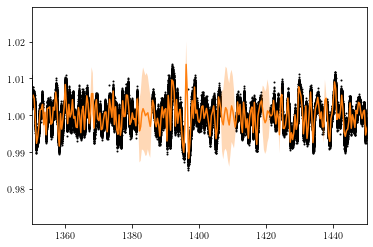

In [166]:
plt.scatter(time, flux,s=1,c='k')
# Plot the prediction and the 1-sigma uncertainty
sd_rot = np.sqrt(var_rot)
art = plt.fill_between(mod_t, mu_rot + sd_rot, mu_rot - sd_rot, color="C1", alpha=0.3)
art.set_edgecolor("none")
plt.plot(mod_t, mu_rot, color="C1", label="prediction")
plt.xlim(1350,1450)

In [167]:
with model_rot:
    prot = xo.eval_in_model(
        kernel_rot.psd(2*np.pi*freq), map_soln_rot
    )
    prot_i = xo.eval_in_model(
        kernel_rot.psd(2*np.pi*freq), model_rot.test_point 
    )

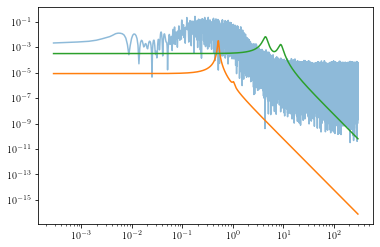

In [168]:
plt.loglog(freq,power,alpha=0.5)
plt.loglog(freq,prot)
plt.loglog(freq,prot_i)

In [174]:
with model_rot:
    trace_rot = pm.sample(
        tune=40,
        draws=80,
        init=map_soln_rot,
        cores=2,
        chains=2,
        step=xo.get_dense_nuts_step(target_accept=0.99),
    )

Only 80 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mix, log_deltaQ, log_Q, period, amp, mean]
Sampling 2 chains: 100%|██████████| 240/240 [2:07:01<00:00, 31.75s/draws]  
/Users/carina/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:464: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The acceptance probability does not match the target. It is 0.967593276018508, but should be close to 0.99. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


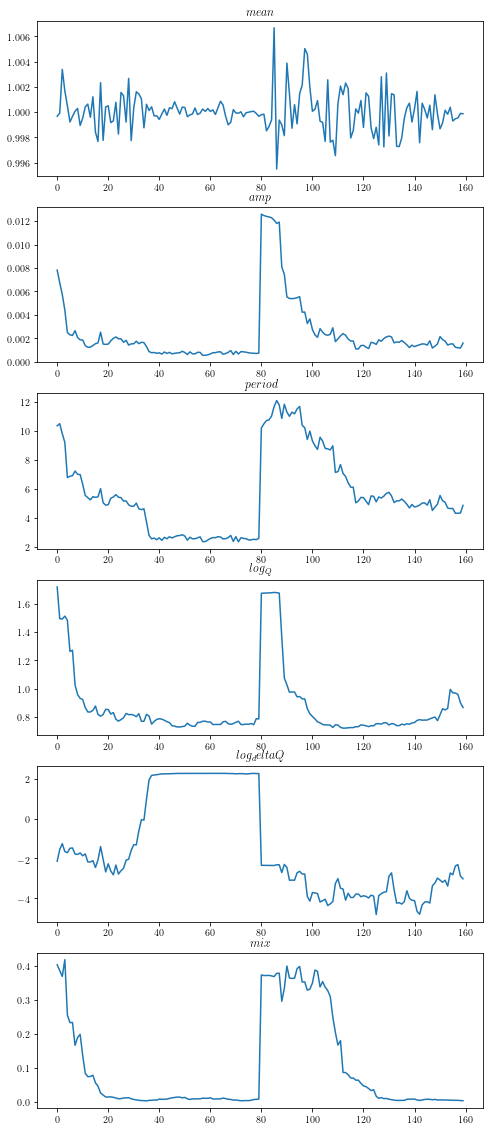

In [175]:
samples_rot = pm.trace_to_dataframe(
    trace_rot, varnames=["mean","amp", "period", "log_Q", "log_deltaQ", "mix"]
)
fig, ax = plt.subplots(6,figsize=(8,20))
for a, col in zip(ax,samples_rot.columns):
    a.plot(samples_rot[col],label=col)
    a.set_title(r'${}$'.format(col))

In [40]:
with pm.Model() as model_hybrid:

    mean = pm.Normal("mean", mu=1.0, sigma=np.std(flux))
    
    amp = pm.InverseGamma(
        "amp", **estimate_inverse_gamma_parameters(0.5*s0, 2*s0)
    )
    period = pm.InverseGamma(
        "period", **estimate_inverse_gamma_parameters(1, 5)
    )
    log_Q0 = pm.Uniform("log_Q", lower=np.log(2), upper=np.log(10))
    log_deltaQ = pm.Uniform("log_deltaQ", lower=np.log(1e-3), upper=np.log(10))
    mix = pm.Uniform("mix", lower=0.001, upper=0.999)

    # Set up the kernel an GP
    kernel_hyb = terms.RotationTerm(amp=amp, period=period, log_Q0=log_Q0, log_deltaQ=log_deltaQ, mix=mix)
    
    S0 = pm.InverseGamma(
        "S0", **estimate_inverse_gamma_parameters(0.5*s0, 2*s0)
    )
    W0 = pm.InverseGamma(
        "w0", **estimate_inverse_gamma_parameters(0.5*w0, 2*w0)
    )
    # Set up the kernel an GP
    kernel_hyb += terms.SHOTerm(S_tot=S0, w0=W0, Q=1.0 / np.sqrt(2))    
    
    gp_hyb = GP(kernel_hyb, time, err ** 2, mean=mean)

    # Condition the GP on the observations and add the marginal likelihood
    # to the model
    gp_hyb.marginal("gp", observed=flux)

In [41]:
with model_hybrid:
    print(model_hybrid.test_point)
    map_soln_hyb = xo.optimize(start=model_hybrid.test_point)
    print(map_soln_hyb)

{'mean': array(1.), 'amp_log__': array(-1.8091748), 'period_log__': array(0.5556663), 'log_Q_interval__': array(1.38777878e-16), 'log_deltaQ_interval__': array(0.), 'mix_interval__': array(0.), 'S0_log__': array(-1.8091748), 'w0_log__': array(3.06608241)}


optimizing logp for variables: [w0, S0, mix, log_deltaQ, log_Q, period, amp, mean]



{'mean': array(1.00023437), 'amp_log__': array(-2.30437596), 'period_log__': array(5.502134), 'log_Q_interval__': array(17.80029068), 'log_deltaQ_interval__': array(18.91250884), 'mix_interval__': array(-248.13084217), 'S0_log__': array(-4.58478057), 'w0_log__': array(-0.74496792), 'amp': array(0.09982107), 'period': array(245.21466211), 'log_Q': array(2.30258506), 'log_deltaQ': array(2.30258504), 'mix': array(0.001), 'S0': array(0.01020599), 'w0': array(0.47474953)}


message: Desired error not necessarily achieved due to precision loss.
logp: 985434.8718513439 -> 1212173.7840474094


In [42]:
with model_hybrid:
    phyb = xo.eval_in_model(
        kernel_hyb.psd(2*np.pi*freq), map_soln_hyb
    )
    phyb_i = xo.eval_in_model(
        kernel_hyb.psd(2*np.pi*freq), model_hybrid.test_point 
    )

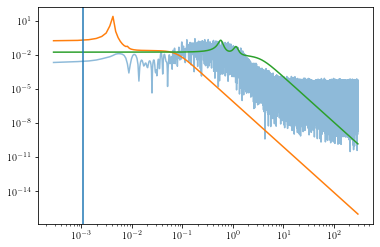

In [43]:
plt.loglog(freq,power,alpha=0.5)
plt.loglog(freq,phyb)
plt.loglog(freq,phyb_i)
plt.axvline(1/950.63867417)